# Step 1 : Reading and Understanding the Data 

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Local file path. Please change the file path accordingly

path = 'datasets/'
train = path + 'treino.csv'
teste = path + 'teste.csv'

In [3]:
# Reading the automobile consulting company file on which analysis needs to be done

df_auto = pd.read_csv(train)
df_auto.head()

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
0,105869496634249611881157692933406072990,8.0000,VOLKSWAGEN,AMAROK,2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO,2017,2017.0000,55672.0000,Automática,4,Picape,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,NaN,123231.9928
1,14165644411757892901957277406025007093,8.0000,JAGUAR,F-PACE,2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO,2017,2017.0000,47858.0000,Automática,4,Utilitário esportivo,N,Branco,PF,Rio de Janeiro,Rio Grande do Sul (RS),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,272076.0236
2,78515656948521351316652580664682810356,14.0000,CHEVROLET,CRUZE,1.8 LT 16V FLEX 4P AUTOMÁTICO,2012,2013.0000,122323.0000,Automática,4,Sedã,N,Prata,PJ,Rio de Janeiro,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53411.5395
3,36797041166808090517929207429817328298,8.0000,PORSCHE,718,2.0 16V H4 GASOLINA BOXSTER PDK,2020,2021.0000,14207.0000,Automática,2,Picape,N,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,NaN,299697.0719
4,338618517701891995317200439137014723900,8.0000,VOLVO,XC90,2.0 INSCRIPTION TURBO GASOLINA 4P 4X4 AUTOMÁTICO,2015,2016.0000,43760.0000,Automática,4,Utilitário esportivo,N,Preto,PF,Ribeirão Preto,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,255164.3442


## Understanding the Dataframe

O dataset original possui 39446 linhas e 29 colunas

In [4]:
# shape of the data
df_auto.shape

(39446, 29)

In [5]:
# information of the data
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39446 entries, 0 to 39445
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   ID                                                          39446 non-null  object 
 1   num_fotos                                                   39209 non-null  float64
 2   marca                                                       39446 non-null  object 
 3   modelo                                                      39446 non-null  object 
 4   versao                                                      39446 non-null  object 
 5   ano_de_fabricacao                                           39446 non-null  int64  
 6   ano_modelo                                                  39446 non-null  float64
 7   odometro                                                    39446 non-null  float64
 

**Insights:**

O dataset possui 3 variáveis do tipo booleano, 5 do tipo float64, 2 do tipo int64, e 19 do tipo object.
Elas podem ser divididas em dos grupos: 7 numéricas e 22 categóricas.

**Insights:**
- Algumas variáveis podem ser excluídas ou seu tipo pode ser corrigido:
- - ID pode ser excluída pois não traz nenhuma informação útil
- - num_fotos é do tipo int e não float
- - ano_modelo é do tipo int e não float
- -  entrega_delivery, troca e elegivel_revisao são booleanos e entram na classificação de variáveis categóricas.
- - attr_veiculo_alienado pode ser excluída pois a coluna está vazia.  

In [6]:
# description of the data
df_auto.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,odometro,num_portas,attr_veiculo_alienado,preco
count,39209.0000,39446.0000,39446.0000,39446.0000,39446.0000,0.0000,39446.0000
mean,10.3238,2016.7481,2017.8072,58382.2434,3.9411,NaN,133385.8743
std,3.4811,4.0848,2.6753,32542.7931,0.3372,NaN,82384.9719
min,8.0000,1985.0000,1997.0000,100.0000,2.0000,NaN,7258.1599
25%,8.0000,2015.0000,2016.0000,31235.2500,4.0000,NaN,76774.3217
50%,8.0000,2018.0000,2018.0000,57244.5000,4.0000,NaN,114307.9706
75%,14.0000,2019.0000,2020.0000,81925.7500,4.0000,NaN,163987.0043
max,21.0000,2022.0000,2023.0000,390065.0000,4.0000,NaN,1359812.8923


In [7]:
df_auto.describe(include='all')

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
count,39446,39209.0000,39446,39446,39446,39446.0000,39446.0000,39446.0000,39446,39446.0000,39446,39446,39446,39446,39446,39446,39446,39446,39446,39446,29230,13898,12239,26223,21250,5788,7903,0.0000,39446.0000
unique,39446,NaN,41,473,2058,NaN,NaN,NaN,7,NaN,8,2,8,2,648,25,4,2,2,1,1,1,1,1,1,1,1,NaN,NaN
top,105869496634249611881157692933406072990,NaN,VOLKSWAGEN,COMPASS,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,NaN,NaN,NaN,Automática,NaN,Sedã,N,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,NaN
freq,1,NaN,6140,1967,1825,NaN,NaN,NaN,30073,NaN,21910,39128,27919,23857,8198,21794,23949,31508,32740,39446,29230,13898,12239,26223,21250,5788,7903,NaN,NaN
mean,NaN,10.3238,NaN,NaN,NaN,2016.7481,2017.8072,58382.2434,NaN,3.9411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133385.8743
std,NaN,3.4811,NaN,NaN,NaN,4.0848,2.6753,32542.7931,NaN,0.3372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82384.9719
min,NaN,8.0000,NaN,NaN,NaN,1985.0000,1997.0000,100.0000,NaN,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7258.1599
25%,NaN,8.0000,NaN,NaN,NaN,2015.0000,2016.0000,31235.2500,NaN,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76774.3217
50%,NaN,8.0000,NaN,NaN,NaN,2018.0000,2018.0000,57244.5000,NaN,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114307.9706
75%,NaN,14.0000,NaN,NaN,NaN,2019.0000,2020.0000,81925.7500,NaN,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163987.0043


# Step 2: Cleaning the Data

We need to do some basic cleansing activity in order to feed our model the correct data.

In [8]:
# dropping 'ID','attr_veiculo_alienado' based on business knowledge

df = df_auto.drop(['ID','attr_veiculo_alienado'],axis=1)
df.shape

(39446, 27)

In [9]:
# Calculating the Missing Values % contribution in DF

df_null = df.isna().mean().round(4) * 100
df_null.sort_values(ascending=False)

attr_veiculo_garantia_de_fábrica                             85.3300
attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro   79.9700
attr_veiculo_todas_as_revisões_feitas_pela_concessionária    68.9700
attr_veiculo_único_dono                                      64.7700
attr_veiculo_licenciado                                      46.1300
attr_veiculo_ipva_pago                                       33.5200
attr_veiculo_aceita_troca                                    25.9000
num_fotos                                                    0.6000 
estado_vendedor                                              0.0000 
elegivel_revisao                                             0.0000 
troca                                                        0.0000 
entrega_delivery                                             0.0000 
tipo_anuncio                                                 0.0000 
cidade_vendedor                                              0.0000 
marca                             

**Insights:**
- As colunas iniciadas com attr_veiculo_ tem muitos valores faltantes. 

In [10]:
# corrigindo o tipo de algumas features
# Antes de mudar o tipo de num_fotos devo preencher os valores faltantes. Vou supor que são 0.
df['num_fotos'].fillna(0, inplace=True)
df['num_fotos'] = df['num_fotos'].astype('int64')
df['ano_modelo'] = df['ano_modelo'].astype('int64')
df['elegivel_revisao'] = df['elegivel_revisao'].astype('str')
df['entrega_delivery'] = df['entrega_delivery'].astype('str')
df['troca'] = df['troca'].astype('str')
df['num_portas'] = df['num_portas'].astype('str')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39446 entries, 0 to 39445
Data columns (total 27 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   num_fotos                                                   39446 non-null  int64  
 1   marca                                                       39446 non-null  object 
 2   modelo                                                      39446 non-null  object 
 3   versao                                                      39446 non-null  object 
 4   ano_de_fabricacao                                           39446 non-null  int64  
 5   ano_modelo                                                  39446 non-null  int64  
 6   odometro                                                    39446 non-null  float64
 7   cambio                                                      39446 non-null  object 
 

In [12]:
df.head(3)

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,preco
0,8,VOLKSWAGEN,AMAROK,2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO,2017,2017,55672.0000,Automática,4,Picape,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,123231.9928
1,8,JAGUAR,F-PACE,2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO,2017,2017,47858.0000,Automática,4,Utilitário esportivo,N,Branco,PF,Rio de Janeiro,Rio Grande do Sul (RS),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,272076.0236
2,14,CHEVROLET,CRUZE,1.8 LT 16V FLEX 4P AUTOMÁTICO,2012,2013,122323.0000,Automática,4,Sedã,N,Prata,PJ,Rio de Janeiro,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,53411.5395


In [13]:
# Analisando a coluna versao
df.versao

0        2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO  
1        2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO                  
2        1.8 LT 16V FLEX 4P AUTOMÁTICO                                    
3        2.0 16V H4 GASOLINA BOXSTER PDK                                  
4        2.0 INSCRIPTION TURBO GASOLINA 4P 4X4 AUTOMÁTICO                 
                               ...                                        
39441    1.6 MSI TRENDLINE 8V FLEX 4P MANUAL                              
39442    2.0 16V SPORT ACTIVEFLEX 4P AUTOMÁTICO                           
39443    1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO                           
39444    2.0 COMFORTLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO
39445    2.0 16V GASOLINA 4P AUTOMÁTICO                                   
Name: versao, Length: 39446, dtype: object

In [14]:
df.versao.value_counts()

1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO                            1825
2.0 16V FLEX LIMITED AUTOMÁTICO                                   1355
2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC                    1007
1.0 200 TSI COMFORTLINE AUTOMÁTICO                                624 
2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO    567 
                                                                 ...  
2.4 ELEGANCE GASOLINA 4P AUTOMÁTICO                               1   
1.4 MPI FREEDOM CS 8V FLEX 2P MANUAL                              1   
2.8 SR CHALLENGE 4X4 CD 16V DIESEL 4P AUTOMÁTICO                  1   
2.0 I GLX 16V GASOLINA 4P AUTOMÁTICO                              1   
1.0 EX 12V FLEX 4P MANUAL                                         1   
Name: versao, Length: 2058, dtype: int64

**Insights:**
- A coluna versao tem muitas informações que podem ser relevantes para o nosso modelo, mas deixaremos para explorá-la num ciclo futuro. Devido à sua alta cardinalidade (muitas categorias diferentes), vou removê-la, por enquanto.

In [15]:
# dropping versao

df = df.drop('versao',axis=1)

In [16]:
# checking for duplicates

df.loc[df.duplicated()]

,num_fotos,marca,modelo,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,preco


In [17]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

In [18]:
print(df.shape)
print(df_num.shape)
print(df_cat.shape)

(39446, 26)
(39446, 5)
(39446, 21)


In [19]:
df_num.head(3)

,num_fotos,ano_de_fabricacao,ano_modelo,odometro,preco
0,8,2017,2017,55672.0000,123231.9928
1,8,2017,2017,47858.0000,272076.0236
2,14,2012,2013,122323.0000,53411.5395


# Step 3: Visualising the Data
- Aqui vamos identificar se alguns preditores tem uma forte correlação com a variável preco

## Marcas

**Insights:**
- Total de 41 marcas no dataset.
- Volkswagen é a marca favorita (6140/39446), 15,57% do dataset. 1,53 vezes maior que a marca em segundo lugar.
- Chevrolet fica em segundo lugar (4020/39446), 10,19% do dataset.
- Top 10 (76% do dataset): VOLKSWAGEN, CHEVROLET, TOYOTA, HYUNDAI, JEEP, FIAT, BMW, AUDI, PEUGEOT, HONDA
- As outras 31 marcas somadas representam 24% do dataset.


## Preços

Visualizing the distribution of car prices

In [20]:
df.preco.describe()

count   39446.0000  
mean    133385.8743 
std     82384.9719  
min     7258.1599   
25%     76774.3217  
50%     114307.9706 
75%     163987.0043 
max     1359812.8923
Name: preco, dtype: float64

**Insights:**
- The plots seems to be right skewed, the prices of almost all cars looks like less than 400.000.
- O terceiro quartil é 163987.00

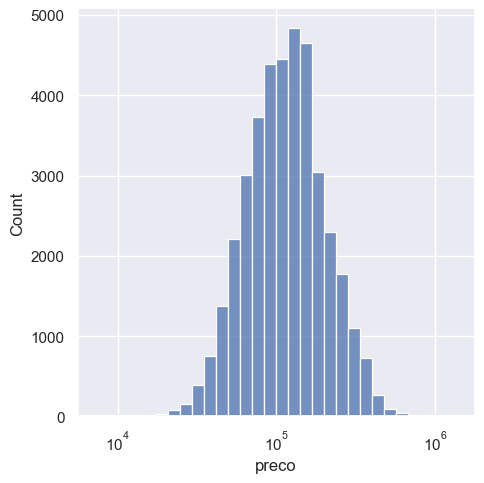

In [21]:
# Transformação logarítmica

#plt.title('Car Price Distribution Plot')
sns.displot(df['preco'], bins=30, log_scale=True)

**Insights:**
- Aplicando uma transformação logarítmica observamos que a curva se aproxima de uma gaussiana

In [22]:
# Análise da variável alvo preco

outliers = ['preco']
plt.rcParams['figure.figsize'] = [8,8]
sns.catplot(data=df_auto[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7, kind='box')
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df_auto.shape

(39446, 29)

In [23]:
print(f'Temos {len(df.loc[df.preco > 300000])} carros acima de 300k. {len(df.loc[df.preco > 300000])*100/len(df):.2f}% do total.')

Temos 1827 carros acima de 300k. 4.63% do total.


**Insights:** 
- Os valores acima de 300k podem ser considerados outliers mas não vou excluí-los.
- There are some price ranges above 300k which can be termed as outliers but lets not remove it.

## Variáveis Numéricas

**Visualizing Numeric Variables**

Pairplot of all the numeric variables

In [24]:
df_num.corr()

,num_fotos,ano_de_fabricacao,ano_modelo,odometro,preco
num_fotos,1.0000,0.0163,0.0127,0.0374,-0.0287
ano_de_fabricacao,0.0163,1.0000,0.8586,-0.7287,0.2341
ano_modelo,0.0127,0.8586,1.0000,-0.7904,0.2096
odometro,0.0374,-0.7287,-0.7904,1.0000,-0.3558
preco,-0.0287,0.2341,0.2096,-0.3558,1.0000


**Insights**:
- num_portas parece ser um pouco relevante para o preço do carro.
- num_fotos doesn't show any significant trend with price.
- odometro - seem to have a significant negative correlation with price.

## Ano de Fabricação e Modelo

**Insights:**
- A empresa pode ter iniciado suas atividades em 2012. Carros mais novos e caros foram adicionados ao dataset a partir desta data.

In [25]:
print(f'Apenas {len(df.loc[df.ano_de_fabricacao<2012])*100/len(df):.2f}% dos carros foram fabricados antes de 2012.')
print(f'Apenas {len(df.loc[df.ano_modelo<2012])*100/len(df):.2f}% dos carros são de modelos anteriores ao ano de 2012.')

Apenas 4.73% dos carros foram fabricados antes de 2012.
Apenas 0.84% dos carros são de modelos anteriores ao ano de 2012.


In [26]:
# Correlação das duas variáveis

df['ano_de_fabricacao'].corr(df['ano_modelo'])

0.8585951668713093

**Insights:**
- ano_fabricacao: a média de preços aumenta a partir de 2011, se estabilizando por volta de 2016.
- ano_modelo: a média de preços aumenta um pouco a partir de 2014. Em 2009 há um pico devido a apenas dois carros cadastrados com um valor acima de 160.000 reais.
- Em vários casos o ano_modelo e ano_de_fabricacao estão muito distantes. Talvez seja um erro no cadastro ou uma interpretação errada que estou fazendo.
- A correlação entre as duas variáveis é bem alta (0.86). Posso excluir uma delas futuramente.
- Apenas 4.73% dos carros foram fabricados antes de 2012.
- Apenas 0.84% dos carros são de modelos anteriores ao ano de 2012.


## Tipos

**Insights:**
- Sedã 21,910 - 56%
- Hatchback 6,570 - 17%
- Picape 6,426 - 16%
- Utilitário esportivo 4,458 - 11%
- Perua/SW 37 - <1%
- Cupê 34 - <1%
- Minivan 10 - <1%
- Conversível 1 - <1%

**Insights:**
- Aqui podemos observar que alguns carros tem tipo errado. O Porsche 911 é classificado como picape e sedã.


## Câmbio, Cor, Tipo de Anúncio, Blindado, Tipo de Vendedor 

In [27]:
df_cat

,marca,modelo,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro
0,VOLKSWAGEN,AMAROK,Automática,4,Picape,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro
1,JAGUAR,F-PACE,Automática,4,Utilitário esportivo,N,Branco,PF,Rio de Janeiro,Rio Grande do Sul (RS),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro
2,CHEVROLET,CRUZE,Automática,4,Sedã,N,Prata,PJ,Rio de Janeiro,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN
3,PORSCHE,718,Automática,2,Picape,N,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN
4,VOLVO,XC90,Automática,4,Utilitário esportivo,N,Preto,PF,Ribeirão Preto,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39441,VOLKSWAGEN,FOX,Manual,4,Sedã,N,Prata,PJ,Fortaleza,Ceará (CE),Loja,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN
39442,BMW,120i,Automática,4,Hatchback,N,Branco,PJ,Santos,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN
39443,PEUGEOT,2008,Automática,4,Sedã,N,Cinza,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro
39444,VOLKSWAGEN,AMAROK,Automática,4,Sedã,N,Branco,PJ,Campinas,São Paulo (SP),Concessionária,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN


**Insights:**
- Câmbio parece ser relevante:
- - Automática: 30,073 - 76%
- - Manual: 6,631 - 17%
- - CVT: 2,39 - 16%
- - Automatizada: 192 - <1%
- - Automatizada: DCT 71 - <1%
- - Semi-automática: 56 - <1%

- cor, tipo_anuncio, blindado parecem ser features relevantes. a cor cinza se destaca com preços mais elevados.
- Não notei grande alteração nos preços com a feature tipo_vendedor


In [28]:
df_auto.cambio.value_counts(normalize=True)

Automática              0.7624
Manual                  0.1681
CVT                     0.0606
Automatizada            0.0049
Automatizada DCT        0.0018
Semi-automática         0.0014
Automática Sequencial   0.0008
Name: cambio, dtype: float64

**Insights:**
- Na coluna 'cambio' a mediana da categoria 'automatizada_dct' é a mais cara porém representa 0,18% do dataset.

In [29]:
df1 = df.fillna(0)

**Insights:**
- Os carros mais novos tendem a possuir garantia de fábrica.

## Attr

**Analisando colunas que começam com 'attr'**

Essas colunas tem muitos valores faltantes

In [30]:
df_attr = df_auto.filter(regex='attr')
df_attr.head()

,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado
0,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,NaN
1,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN
2,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,NaN
4,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN


In [31]:
# Comentei porque as figuras ficaram muito grandes. Fiz os mesmos gráficos na célula abaixo


# for feature in df_attr.columns:
#     data = df_auto.copy()
    
#     # let's make a variable that indicates 1 if the observation was missing or zero otherwise
#     data[feature] = np.where(data[feature].isnull(), 0, data[feature])
    
#     # let's calculate the mean SalePrice where the information is missing or present
#     data.groupby(feature)['preco'].mean().plot.bar()
#     plt.title(feature)
#     plt.show()


In [32]:
df_attr = df_attr.fillna(0)
df_attr_preco = pd.concat([df_attr, df_auto['preco']], axis=1)
df_attr_preco.head()

,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
0,Aceita troca,0,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,0,Todas as revisões feitas pela agenda do carro,0.0000,123231.9928
1,Aceita troca,0,Todas as revisões feitas pela concessionária,IPVA pago,0,0,Todas as revisões feitas pela agenda do carro,0.0000,272076.0236
2,Aceita troca,0,0,0,0,0,0,0.0000,53411.5395
3,Aceita troca,0,Todas as revisões feitas pela concessionária,0,0,0,0,0.0000,299697.0719
4,Aceita troca,0,Todas as revisões feitas pela concessionária,0,0,0,Todas as revisões feitas pela agenda do carro,0.0000,255164.3442


**Insights**:
- A única coluna que parece gerar uma diferença relevante é 'attr_veiculo_garantia_de_fabrica'. Apenas 5788 carros de 39446 (14,67%) tem garantia de fábrica.

## Estado do Vendedor 

## 'entrega_delivery', 'troca', 'elegivel_revisao'

**Insights:** 
- Carros que não possuem 'entrega_delivery' e 'troca' parecem ser um pouco mais caros.
- A feature 'elegivel_revisao' possui todos os valores idênticos e pode ser descartada.

In [36]:
df=df.drop('elegivel_revisao',axis=1)

## Car Level

In [37]:
#Binning the Car Companies based on avg prices of each car Company.

df2=df.copy()
df2['preco'] = df2['preco'].astype('int')
df2_temp = df2.copy()
t = df2_temp.groupby(['marca'])['preco'].median()
df2_temp = df2_temp.merge(t.reset_index(), how='left',on='marca')
bins = [0,100000,150000,300000,2000000]
label =['Budget_Friendly','Medium_Range','High_Range','TopNotch_Cars']
df2['Cars_Category'] = pd.cut(df2_temp['preco_y'],bins,right=False,labels=label)
df2.head()

,num_fotos,marca,modelo,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,preco,Cars_Category
0,8,VOLKSWAGEN,AMAROK,2017,2017,55672.0000,Automática,4,Picape,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,123231,Medium_Range
1,8,JAGUAR,F-PACE,2017,2017,47858.0000,Automática,4,Utilitário esportivo,N,Branco,PF,Rio de Janeiro,Rio Grande do Sul (RS),Pessoa Física,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,272076,High_Range
2,14,CHEVROLET,CRUZE,2012,2013,122323.0000,Automática,4,Sedã,N,Prata,PJ,Rio de Janeiro,São Paulo (SP),Loja,True,True,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,53411,Budget_Friendly
3,8,PORSCHE,718,2020,2021,14207.0000,Automática,2,Picape,N,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,299697,TopNotch_Cars
4,8,VOLVO,XC90,2015,2016,43760.0000,Automática,4,Utilitário esportivo,N,Preto,PF,Ribeirão Preto,São Paulo (SP),Pessoa Física,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,255164,High_Range


In [38]:
df2.Cars_Category.value_counts()

Medium_Range       20045
Budget_Friendly    13124
High_Range         5585 
TopNotch_Cars      692  
Name: Cars_Category, dtype: int64

## Significant Variables

In [40]:
df2.columns

Index(['num_fotos', 'marca', 'modelo', 'ano_de_fabricacao', 'ano_modelo',
       'odometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor',
       'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'tipo_anuncio',
       'entrega_delivery', 'troca', 'attr_veiculo_aceita_troca',
       'attr_veiculo_único_dono',
       'attr_veiculo_todas_as_revisões_feitas_pela_concessionária',
       'attr_veiculo_ipva_pago', 'attr_veiculo_licenciado',
       'attr_veiculo_garantia_de_fábrica',
       'attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro', 'preco',
       'Cars_Category'],
      dtype='object')

Significant variables after Visualization:
'Cars_Category' , 'ano_de_fabricacao', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor','attr_veiculo_garantia_de_fábrica'


In [41]:
sig_col = ['Cars_Category' , 'ano_de_fabricacao', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor','attr_veiculo_garantia_de_fábrica','preco']

# Step 4: Data Preparation

In [42]:
df3 = df2[sig_col]

# Substituindo valores vazios por 0
df3.attr_veiculo_garantia_de_fábrica.fillna(0, inplace=True)

# # Transformando num_portas em variável categórica para transformar em dummy
# df3.loc[df3.num_portas==4,'num_portas']='quatro'
# df3.loc[df3.num_portas==3,'num_portas']='tres'
# df3.loc[df3.num_portas==2,'num_portas']='dois'

df3

,Cars_Category,ano_de_fabricacao,odometro,cambio,num_portas,tipo,blindado,cor,attr_veiculo_garantia_de_fábrica,preco
0,Medium_Range,2017,55672.0000,Automática,4,Picape,N,Preto,0,123231
1,High_Range,2017,47858.0000,Automática,4,Utilitário esportivo,N,Branco,0,272076
2,Budget_Friendly,2012,122323.0000,Automática,4,Sedã,N,Prata,0,53411
3,TopNotch_Cars,2020,14207.0000,Automática,2,Picape,N,Branco,0,299697
4,High_Range,2015,43760.0000,Automática,4,Utilitário esportivo,N,Preto,0,255164
...,...,...,...,...,...,...,...,...,...,...
39441,Medium_Range,2015,73755.0000,Manual,4,Sedã,N,Prata,0,146046
39442,High_Range,2016,78859.0000,Automática,4,Hatchback,N,Branco,0,106899
39443,Medium_Range,2021,9793.0000,Automática,4,Sedã,N,Cinza,Garantia de fábrica,173246
39444,Medium_Range,2018,51592.0000,Automática,4,Sedã,N,Branco,0,221671


In [43]:
sig_cat_col = ['Cars_Category','cambio','tipo','blindado','cor','attr_veiculo_garantia_de_fábrica','num_portas']

In [44]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df3[sig_cat_col])
dummies.shape

(39446, 34)

In [45]:
dummies = pd.get_dummies(df3[sig_cat_col], drop_first = True)
dummies.shape

(39446, 27)

In [46]:
dummies

,Cars_Category_Medium_Range,Cars_Category_High_Range,Cars_Category_TopNotch_Cars,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,cambio_Manual,cambio_Semi-automática,tipo_Cupê,tipo_Hatchback,tipo_Minivan,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_S,cor_Branco,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,cor_Verde,cor_Vermelho,attr_veiculo_garantia_de_fábrica_Garantia de fábrica,num_portas_3,num_portas_4
0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39441,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
39442,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
39443,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
39444,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [47]:
# Add the results to the original dataframe

df4 = pd.concat([df3, dummies], axis = 1)

In [48]:
# Drop the original cat variables as dummies are already created

df4.drop( sig_cat_col, axis = 1, inplace = True)
df4.shape

(39446, 30)

In [49]:
df4.head()

,ano_de_fabricacao,odometro,preco,Cars_Category_Medium_Range,Cars_Category_High_Range,Cars_Category_TopNotch_Cars,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,cambio_Manual,cambio_Semi-automática,tipo_Cupê,tipo_Hatchback,tipo_Minivan,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_S,cor_Branco,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,cor_Verde,cor_Vermelho,attr_veiculo_garantia_de_fábrica_Garantia de fábrica,num_portas_3,num_portas_4
0,2017,55672.0000,123231,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2017,47858.0000,272076,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
2,2012,122323.0000,53411,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,2020,14207.0000,299697,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2015,43760.0000,255164,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


# Step 5: Splitting the Data into Training and Testing Sets
As we know, the first basic step for regression is performing a train-test split.

In [50]:
df5 = df4.copy()

In [51]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df5, train_size = 0.7, test_size = 0.3, random_state = 100)

In [52]:
df_train.head()

,ano_de_fabricacao,odometro,preco,Cars_Category_Medium_Range,Cars_Category_High_Range,Cars_Category_TopNotch_Cars,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,cambio_Manual,cambio_Semi-automática,tipo_Cupê,tipo_Hatchback,tipo_Minivan,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_S,cor_Branco,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,cor_Verde,cor_Vermelho,attr_veiculo_garantia_de_fábrica_Garantia de fábrica,num_portas_3,num_portas_4
29631,2018,33860.0000,104400,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
16380,2017,61985.0000,76518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
35258,2016,86719.0000,145075,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
962,2017,104721.0000,90193,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7547,2013,87923.0000,72318,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


**Rescaling the Features**

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
Here, we will use Standardisation Scaling.

In [53]:
scaler = preprocessing.StandardScaler()

In [54]:
sig_num_col = ['ano_de_fabricacao','odometro']

In [55]:
# Apply scaler() to all the columns except the 'dummy' variables

df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

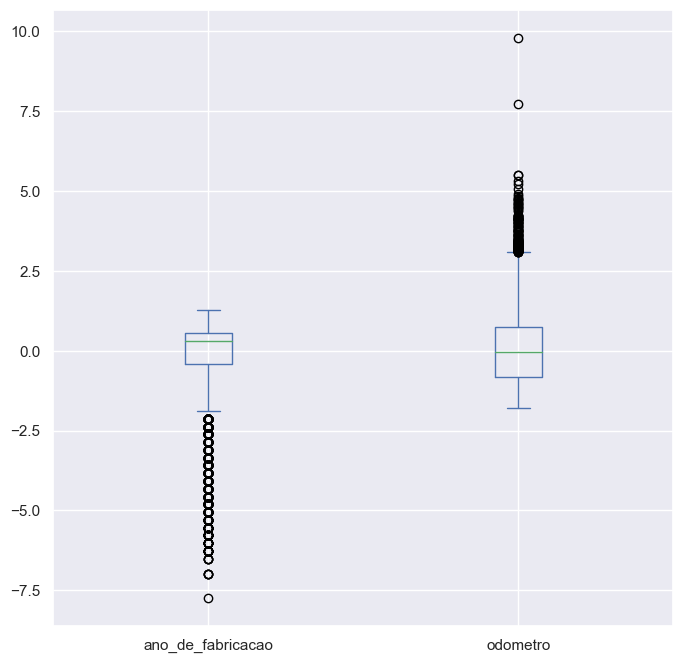

In [64]:
df_train[sig_num_col].plot(kind='box')
plt.show()

In [57]:
df_train.head()

,ano_de_fabricacao,odometro,preco,Cars_Category_Medium_Range,Cars_Category_High_Range,Cars_Category_TopNotch_Cars,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,cambio_Manual,cambio_Semi-automática,tipo_Cupê,tipo_Hatchback,tipo_Minivan,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_S,cor_Branco,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,cor_Verde,cor_Vermelho,attr_veiculo_garantia_de_fábrica_Garantia de fábrica,num_portas_3,num_portas_4
29631,0.3048,-0.7535,104400,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
16380,0.0612,0.1126,76518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
35258,-0.1825,0.8742,145075,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
962,0.0612,1.4286,90193,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7547,-0.9134,0.9113,72318,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


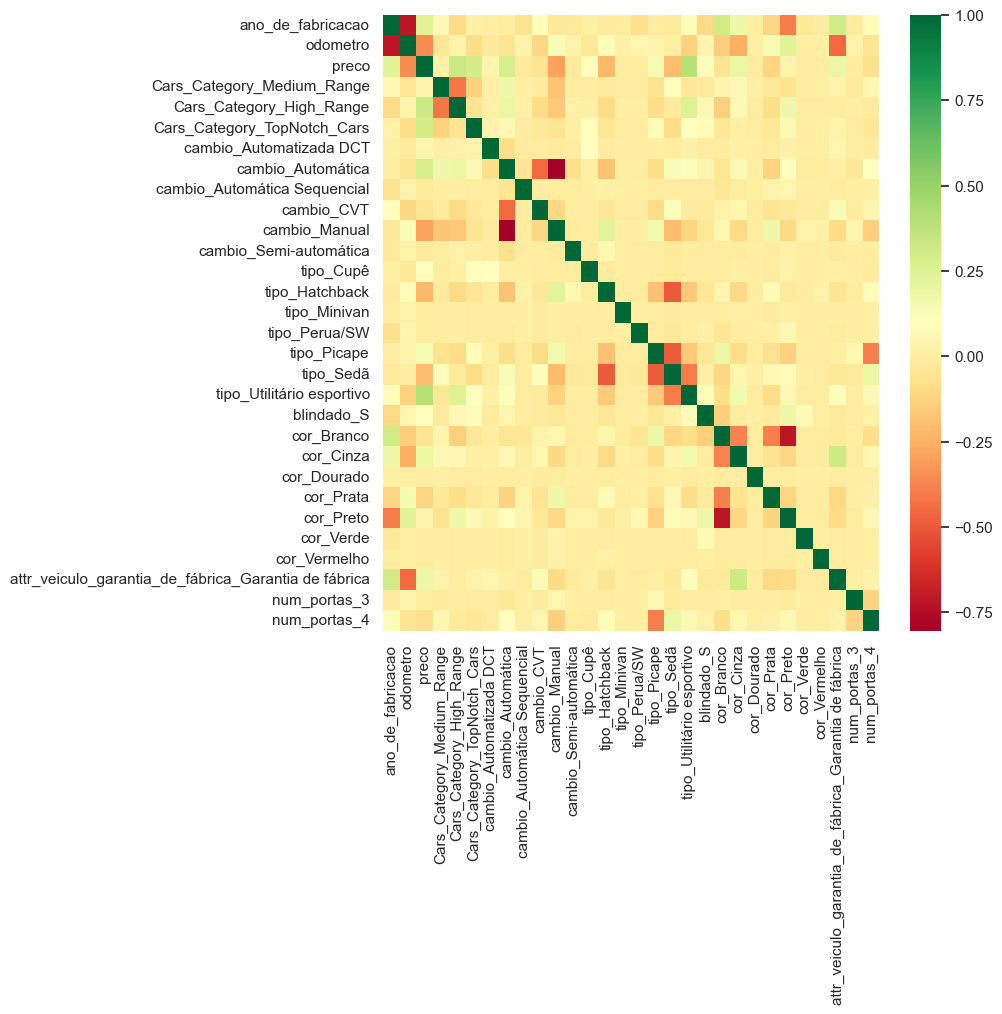

In [65]:
#Let's check the correlation coefficients to see which variables are highly correlated

#plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

**Dividing into X and Y sets for the model building**

In [546]:
y_train = df_train.pop('preco')
X_train = df_train

# Step 6: Building a Linear Model

In [547]:
X_train_1 = X_train['odometro']

In [548]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [549]:
# Check parameters created

lr_1.params

const      185382.3963
odometro   -0.8958    
dtype: float64

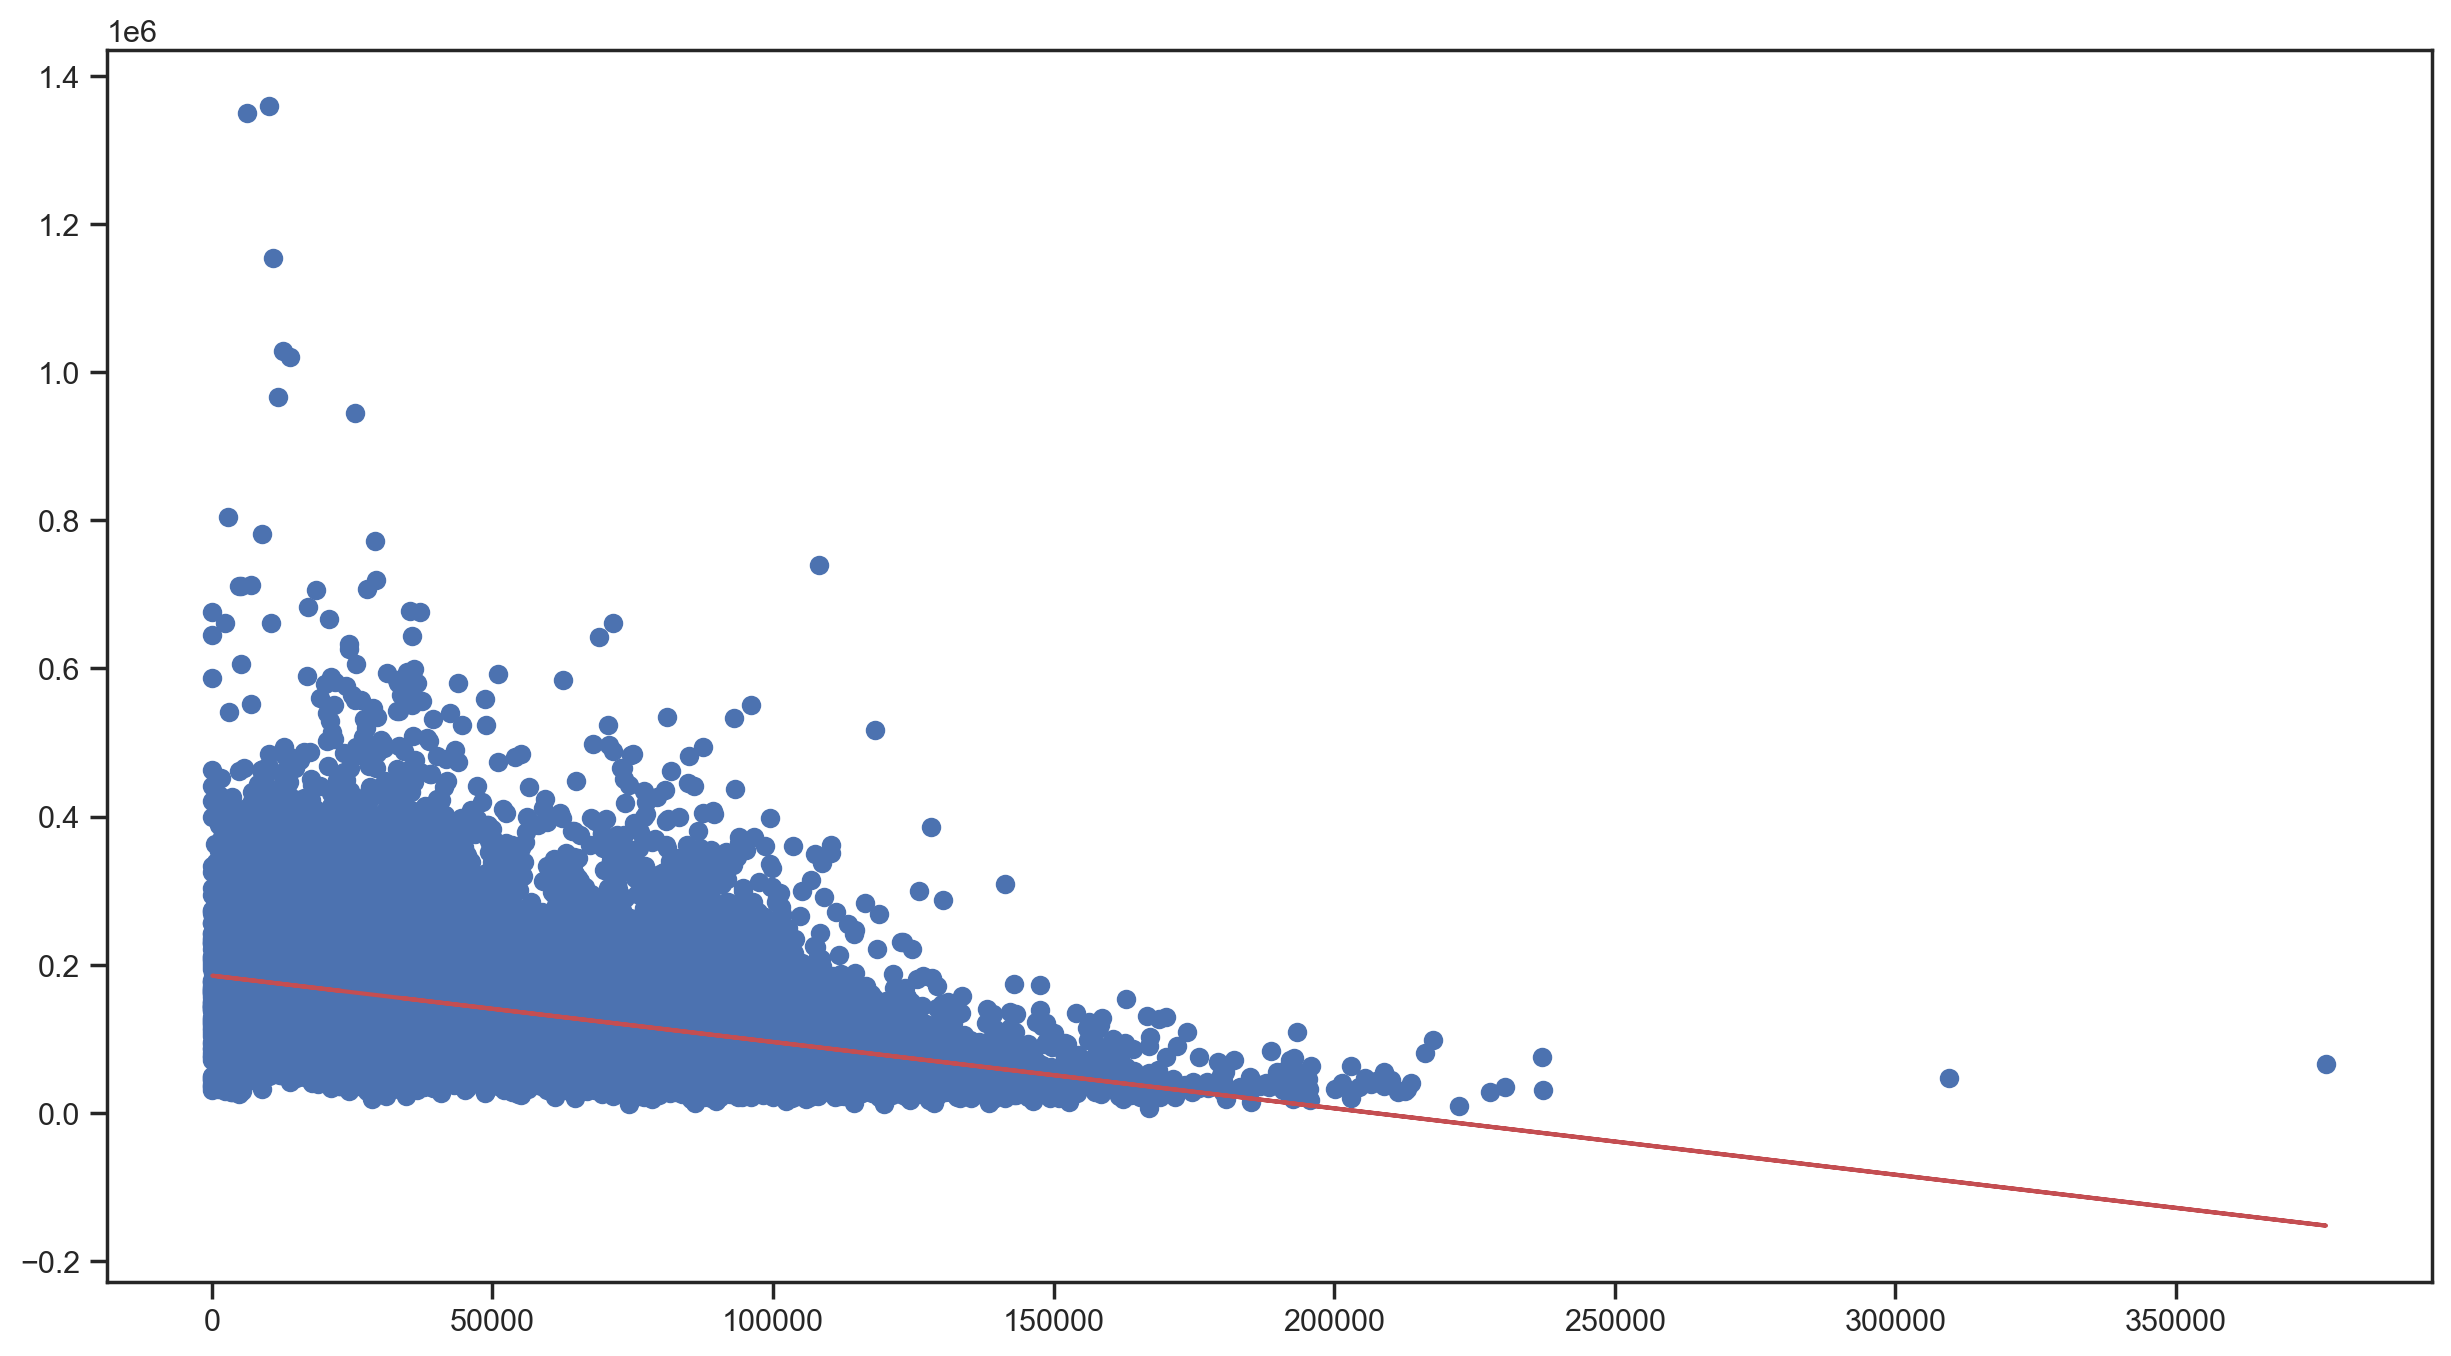

In [551]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], -0.8958*X_train_1c.iloc[:, 1]+185382.3963, 'r')
plt.show()

In [552]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     4025.
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:57:46   Log-Likelihood:            -3.4956e+05
No. Observations:               27612   AIC:                         6.991e+05
Df Residuals:                   27610   BIC:                         6.991e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.854e+05    942.615    196.668      0.0

**Adding another variable**

The R-squared value obtained is 0.127. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. ano_de_fabricacao.

In [553]:
X_train_2 = X_train[['odometro', 'ano_de_fabricacao']]

In [554]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [555]:
lr_2.params

const               2141830.0597
odometro            -0.9847     
ano_de_fabricacao   -967.5290   
dtype: float64

In [556]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     2033.
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:58:34   Log-Likelihood:            -3.4955e+05
No. Observations:               27612   AIC:                         6.991e+05
Df Residuals:                   27609   BIC:                         6.991e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.142e+06   3.29e+0

**Adding another variable**

The R-squared value obtained is 0.128. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. cambio_Manual.

In [557]:
X_train_3 = X_train[['odometro', 'ano_de_fabricacao', 'cambio_Manual']]

In [558]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [559]:
lr_3.params

const               828198.2034
odometro            -0.8447    
ano_de_fabricacao   -315.7290  
cambio_Manual       -54177.1116
dtype: float64

In [560]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     2134.
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:01:07   Log-Likelihood:            -3.4856e+05
No. Observations:               27612   AIC:                         6.971e+05
Df Residuals:                   27608   BIC:                         6.972e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.282e+05   3.19e+0

**All Features**

In [562]:
X_train

,ano_de_fabricacao,odometro,Cars_Category_Medium_Range,Cars_Category_High_Range,Cars_Category_TopNotch_Cars,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,cambio_Manual,cambio_Semi-automática,tipo_Cupê,tipo_Hatchback,tipo_Minivan,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_S,cor_Branco,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,cor_Verde,cor_Vermelho,attr_veiculo_garantia_de_fábrica_Garantia de fábrica,num_portas_quatro,num_portas_tres
29631,2018,33860.0000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
16380,2017,61985.0000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
35258,2016,86719.0000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
962,2017,104721.0000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7547,2013,87923.0000,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,2014,69184.0000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
79,2018,70017.0000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
12119,2017,68033.0000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
14147,2020,55455.0000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [563]:
# Add a constant
X_train_c = sm.add_constant(X_train)

# Create a second fitted model
lr = sm.OLS(y_train, X_train_c).fit()

In [564]:
lr.params

const                                                  -3091819.2963
ano_de_fabricacao                                      1826.9821    
odometro                                               -0.5782      
Cars_Category_Medium_Range                             29295.5447   
Cars_Category_High_Range                               79873.9336   
Cars_Category_TopNotch_Cars                            154161.4992  
cambio_Automatizada DCT                                16005.5513   
cambio_Automática                                      18872.6748   
cambio_Automática Sequencial                           -27523.6059  
cambio_CVT                                             7525.9310    
cambio_Manual                                          -16187.3724  
cambio_Semi-automática                                 -19576.1818  
tipo_Cupê                                              174280.2499  
tipo_Hatchback                                         -26468.1190  
tipo_Minivan                      

In [565]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     991.8
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:03:39   Log-Likelihood:            -3.4183e+05
No. Observations:               27612   AIC:                         6.837e+05
Df Residuals:                   27583   BIC:                         6.840e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [578]:
X_test_1 = sm.add_constant(X_test)

In [579]:
pred_lr = lr.predict(X_test_1)

In [580]:
r2_score(pred_lr,y_test)

-0.01789760072680502

In [576]:
X_train.shape

(27612, 29)

In [577]:
X_test.shape

(11834, 29)

## XGBOOST

In [566]:
from xgboost import XGBRegressor

In [567]:
model = XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [568]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [571]:
y_test = df_test.pop('preco')
X_test = df_test

In [572]:
pred = model.predict(X_test)

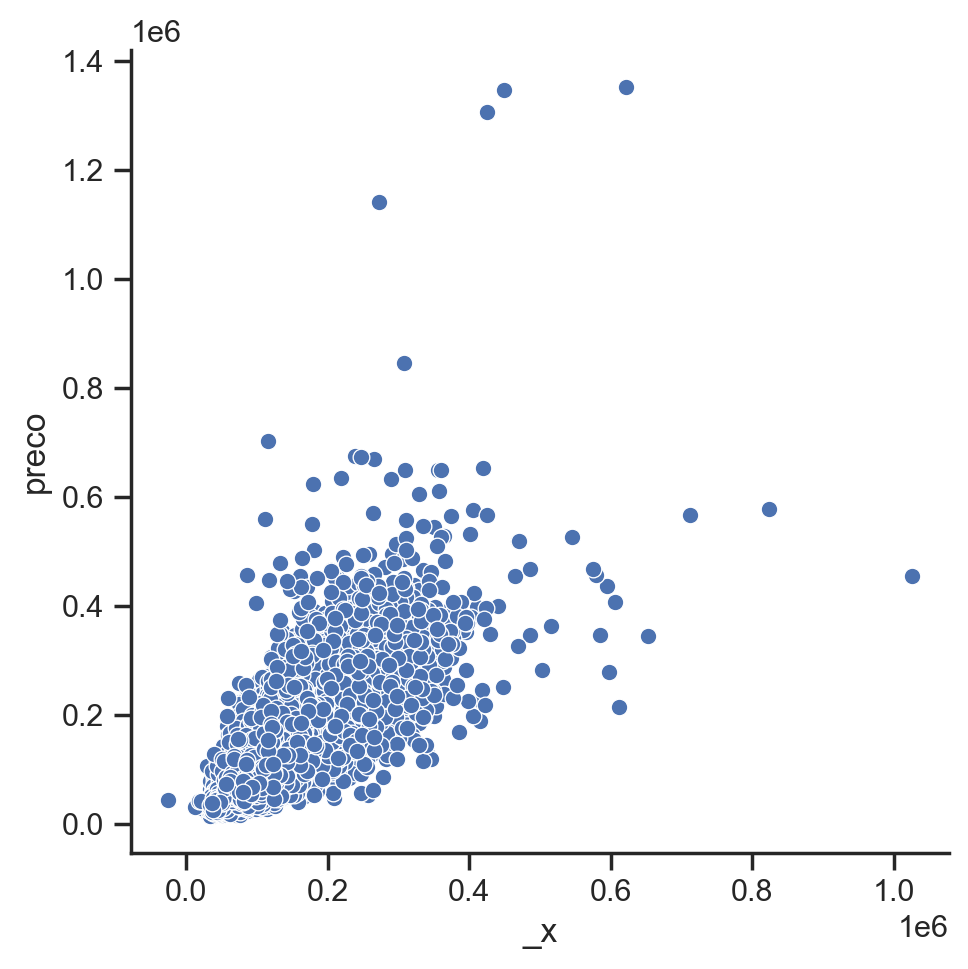

In [573]:
sns.relplot(pred,y_test)

In [574]:
r2_score(pred,y_test)

0.35857076577805735

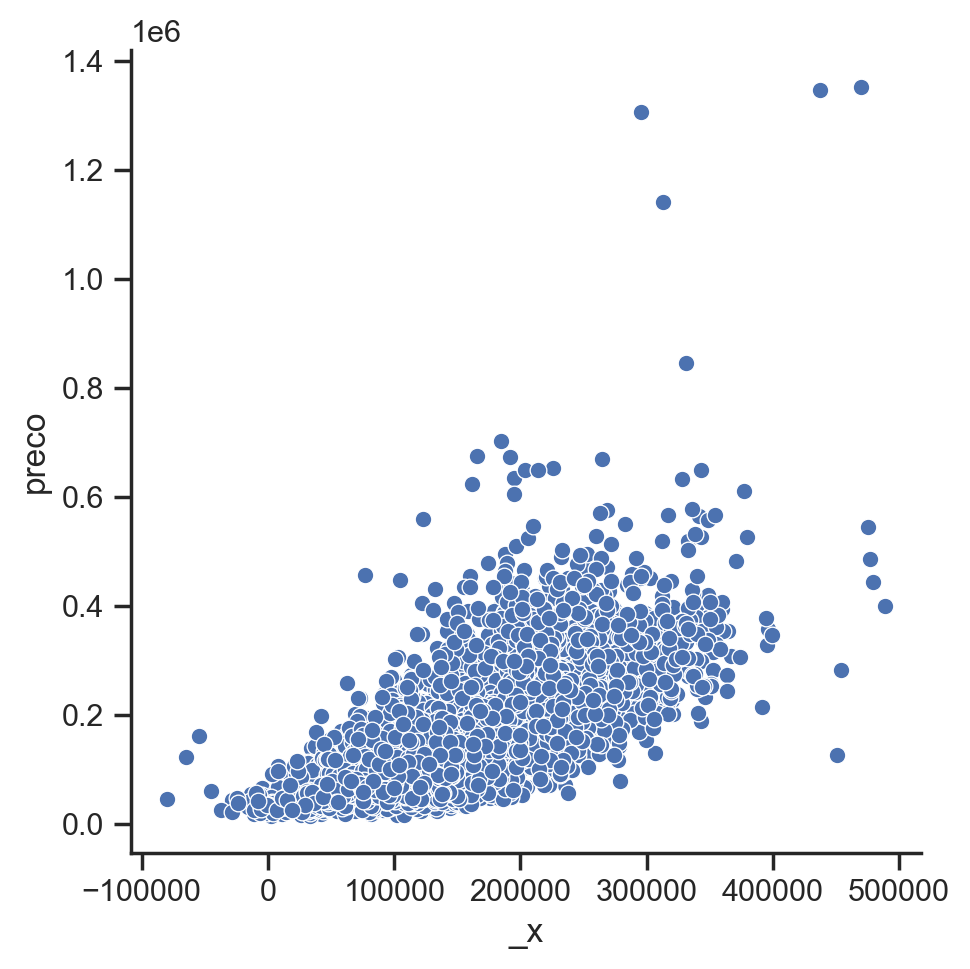

In [581]:
sns.relplot(pred_lr,y_test)

In [582]:
from sklearn.metrics import mean_absolute_error

In [583]:
mean_absolute_error(y_test,pred)

35671.42804870038

In [614]:
from sklearn.model_selection import cross_validate

In [615]:
cross_validate(model, df5.drop('preco',axis=1), df5.preco, scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"])

{'fit_time': array([6.69532919, 4.34096503, 4.58232689, 4.16114497, 4.14757514]),
 'score_time': array([0.02097201, 0.02315688, 0.01934624, 0.029006  , 0.0206809 ]),
 'test_neg_mean_absolute_error': array([-35449.47728112, -35865.93505971, -35003.95932027, -35906.00152333,
        -34798.73805113]),
 'test_neg_root_mean_squared_error': array([-53193.45547614, -52528.00109479, -51493.10136189, -53328.03807372,
        -52179.24266466])}

<AxesSubplot:ylabel='Frequency'>

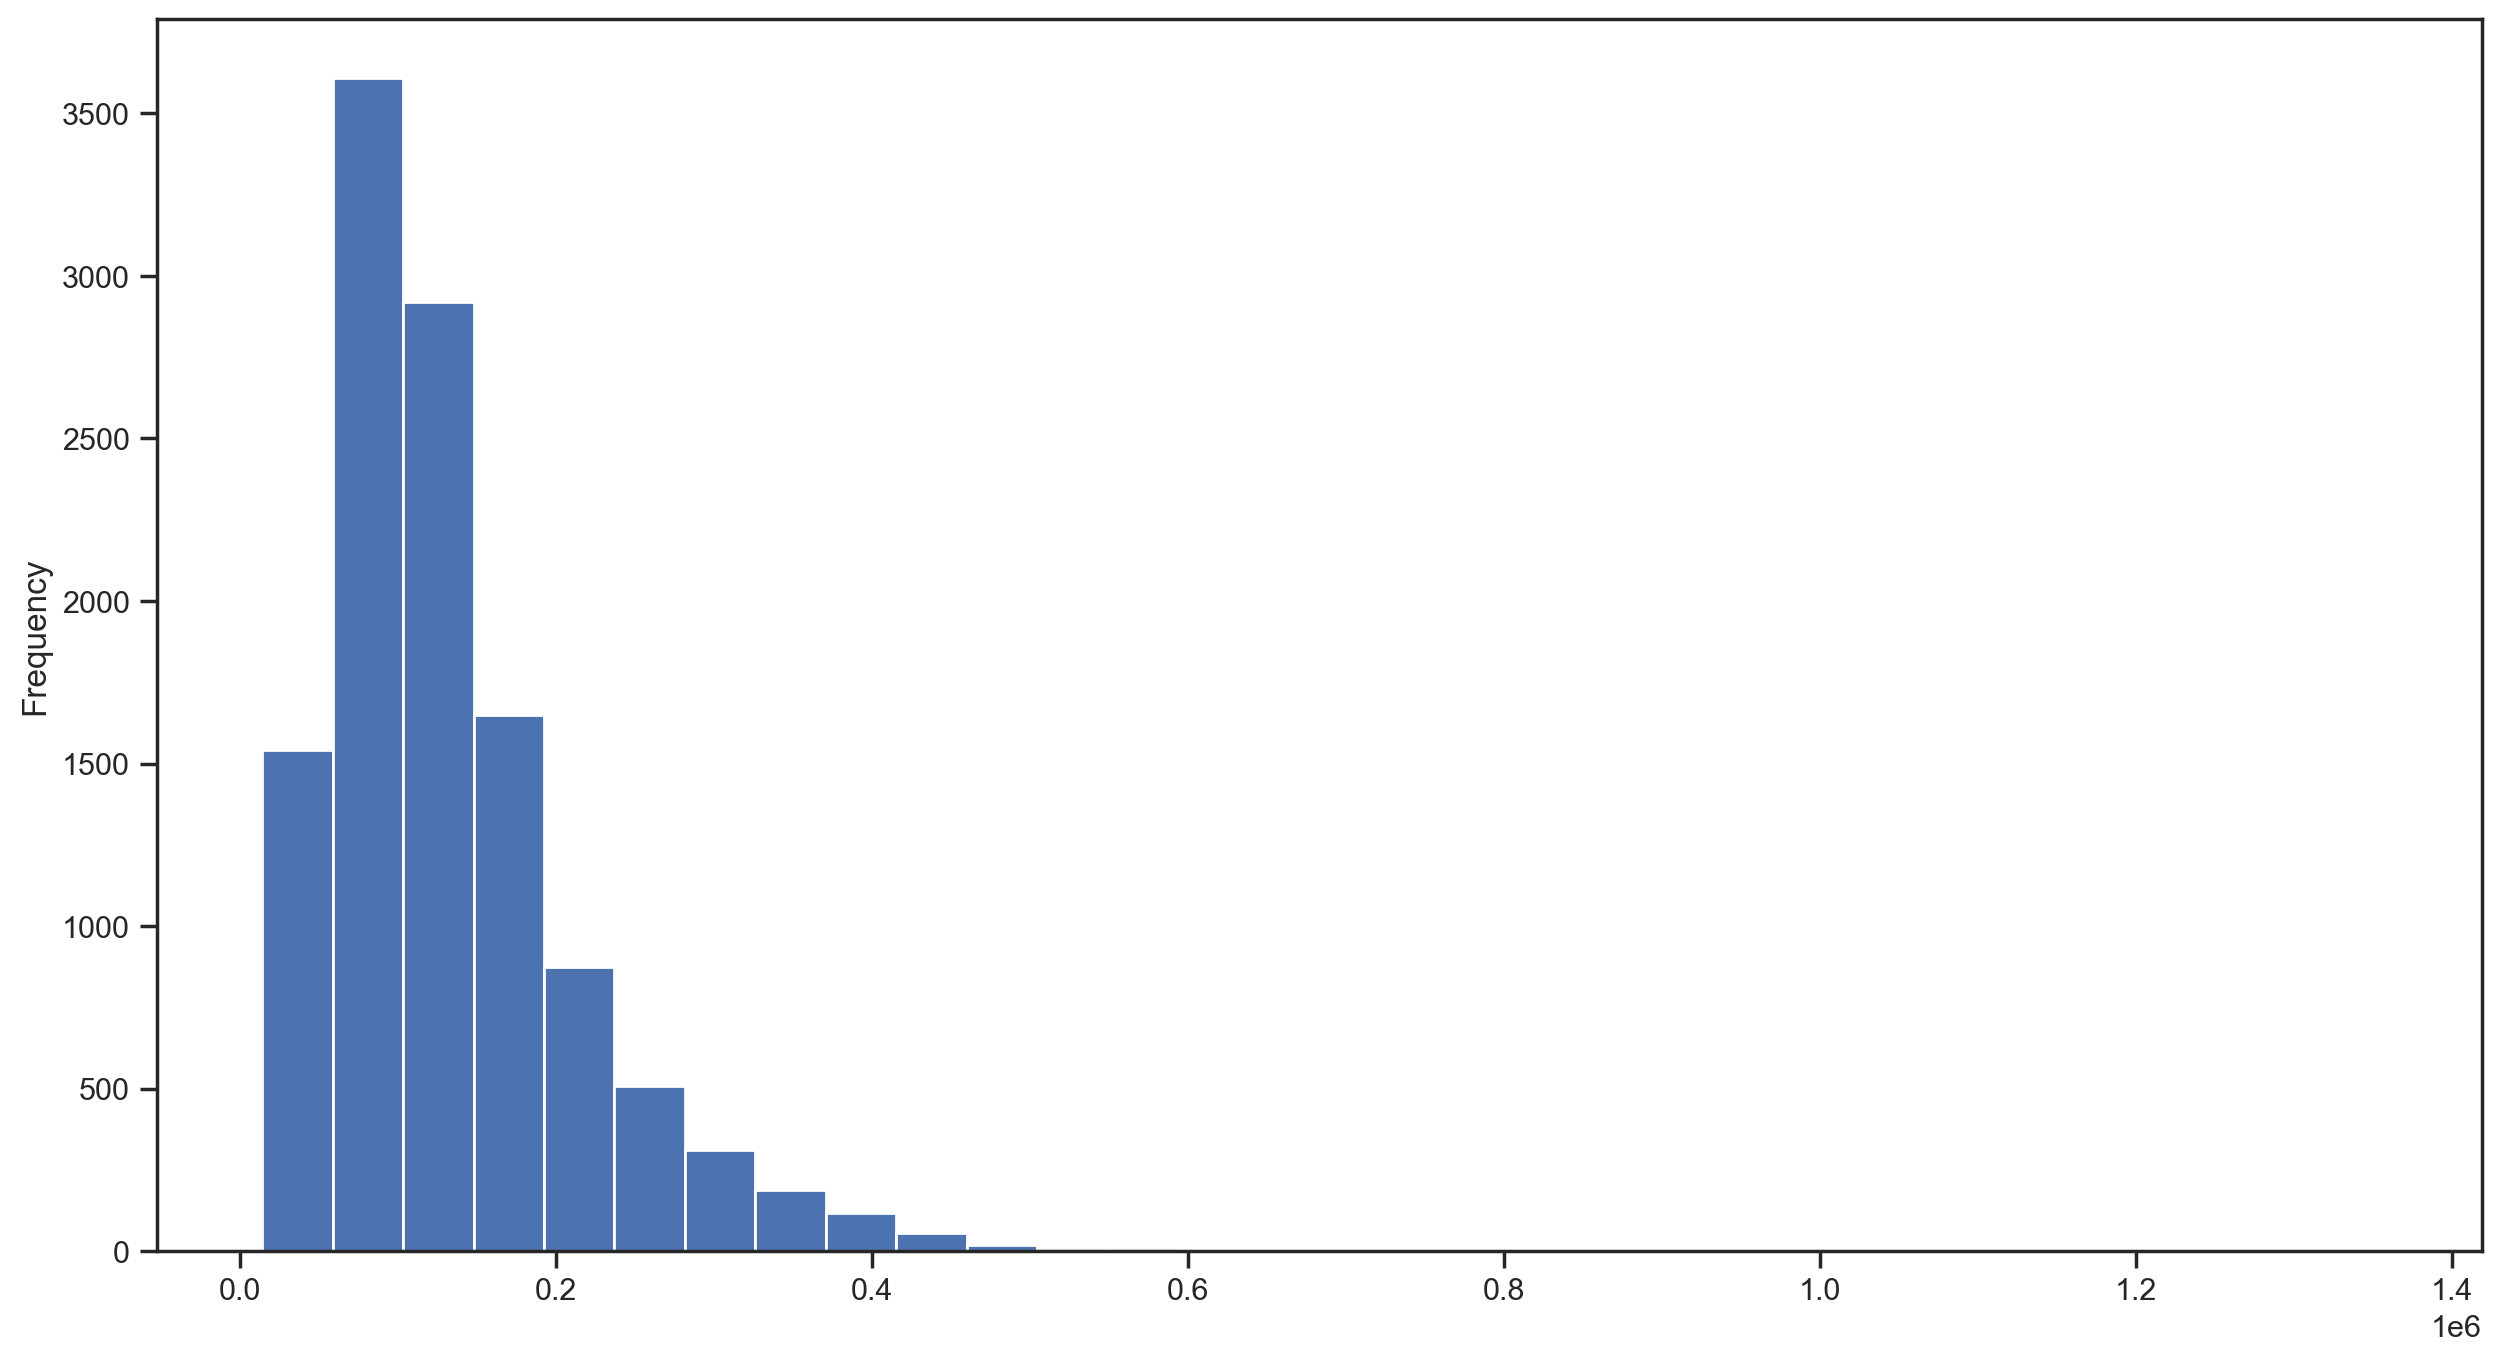

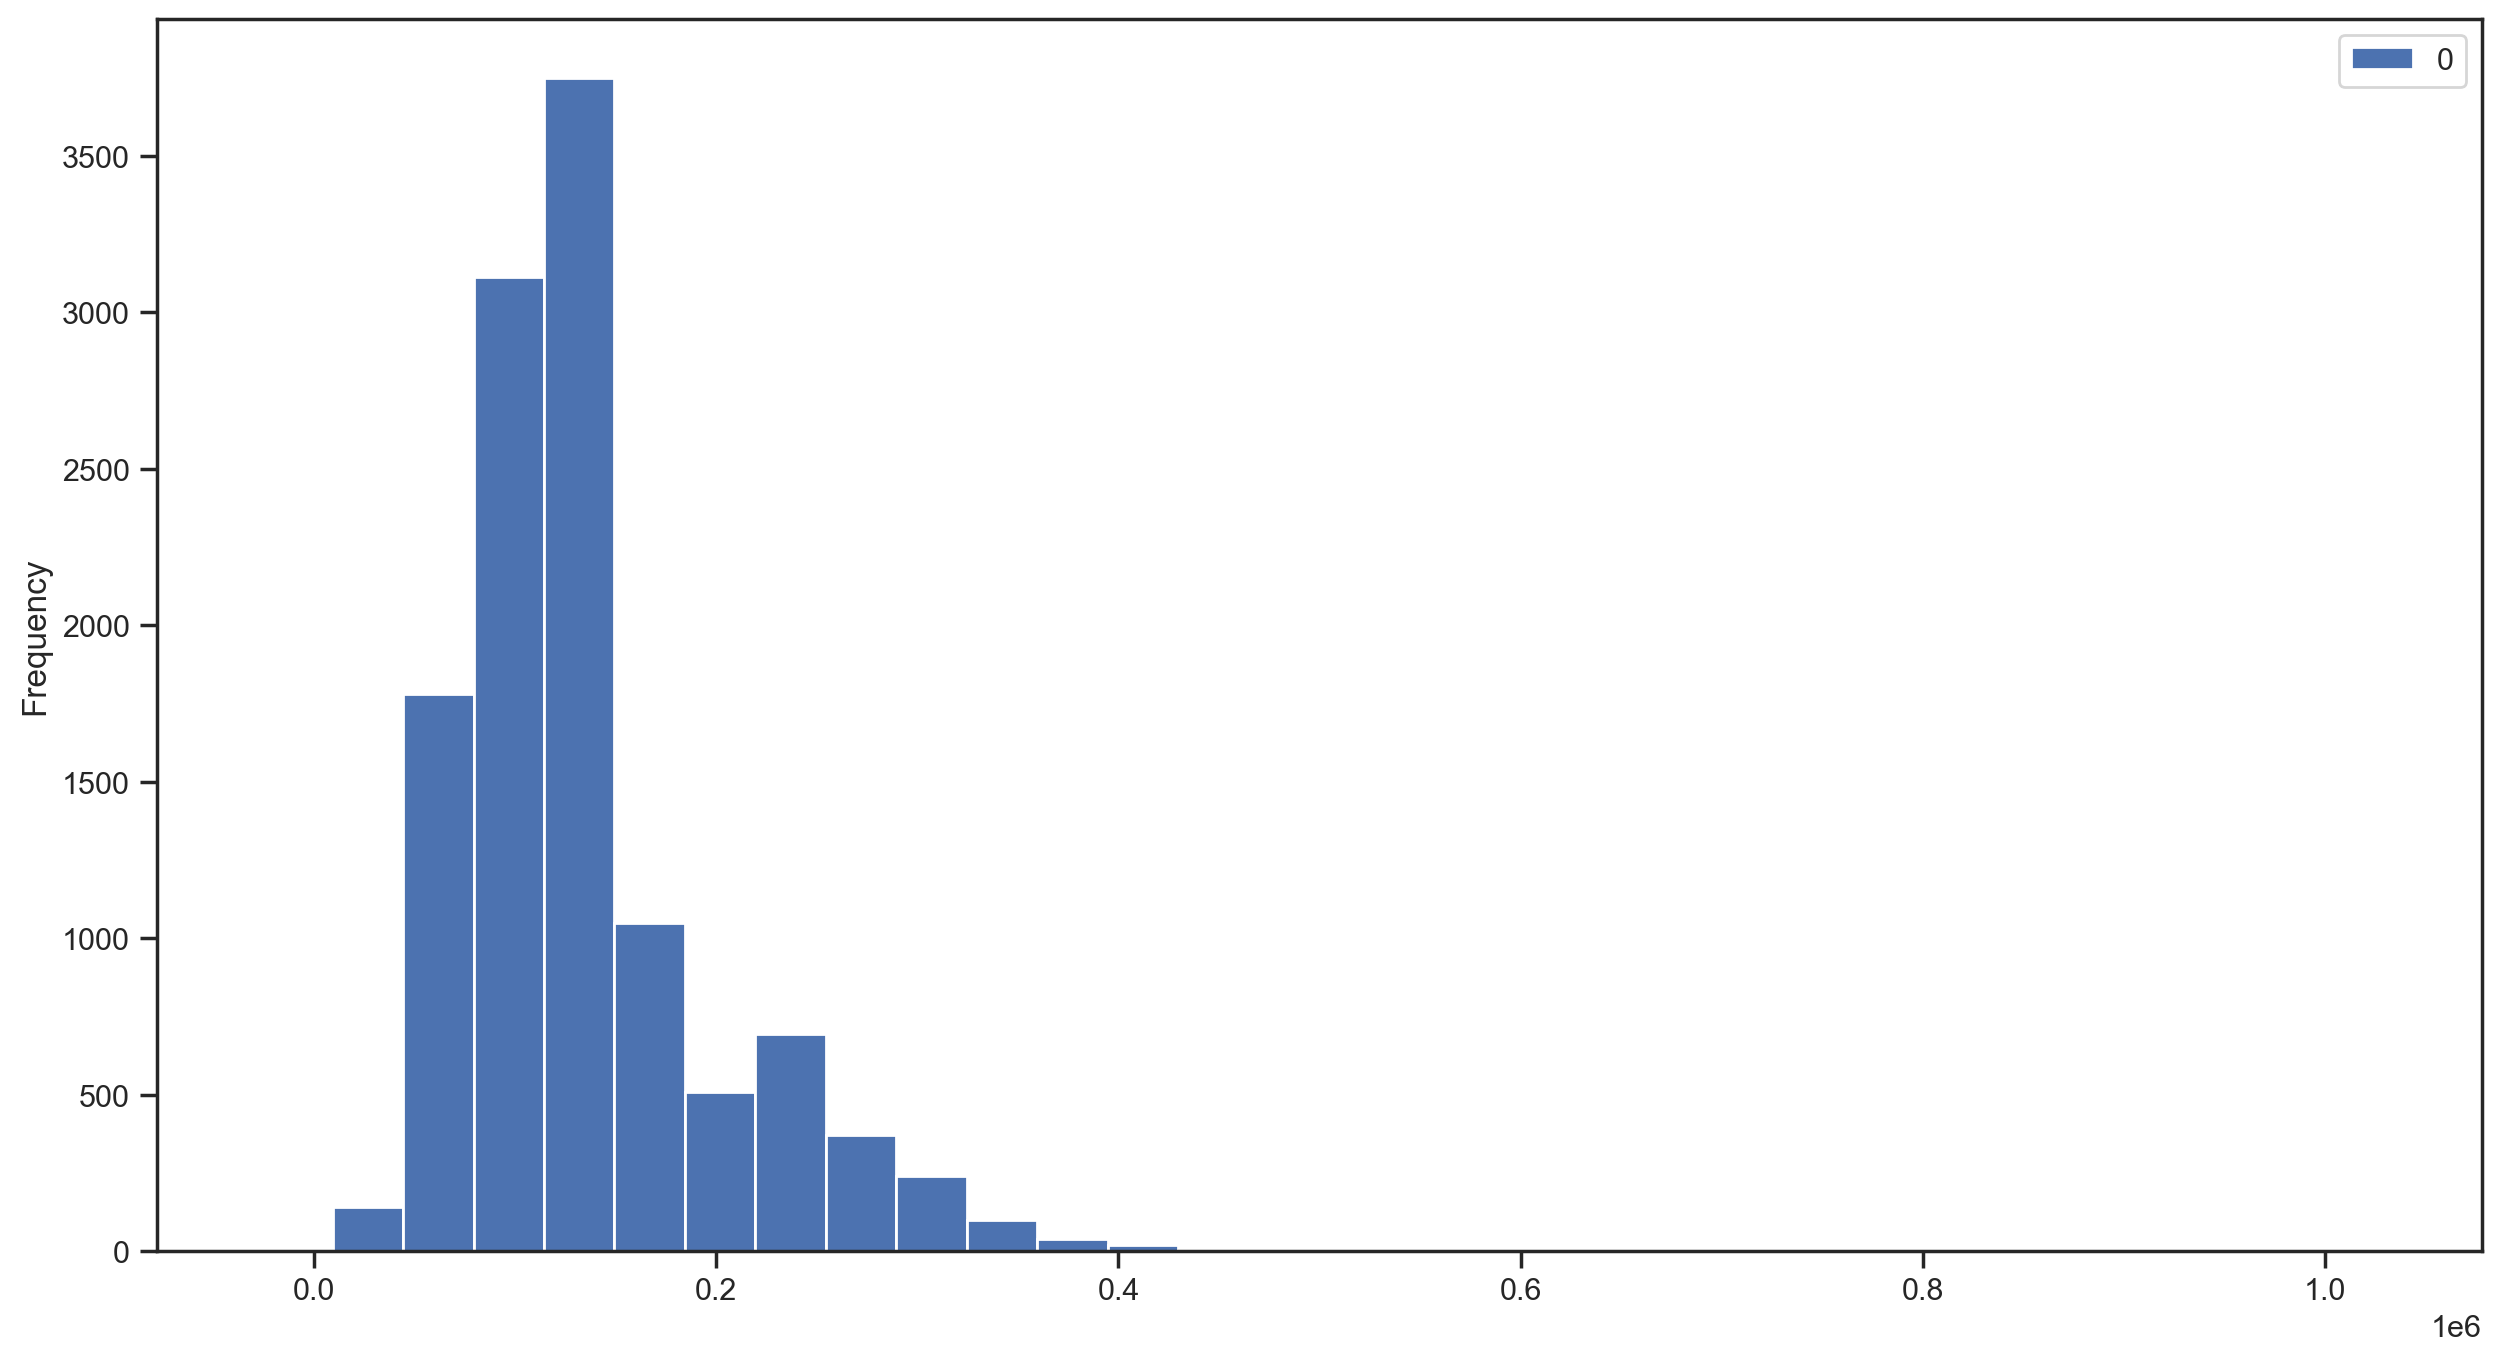

In [587]:
y_test.plot(kind='hist',bins=30)
pd.DataFrame(pred).plot(kind='hist',bins=30)

### Transformação logarítmica no preço

In [588]:
y_train_log = np.log(y_train)

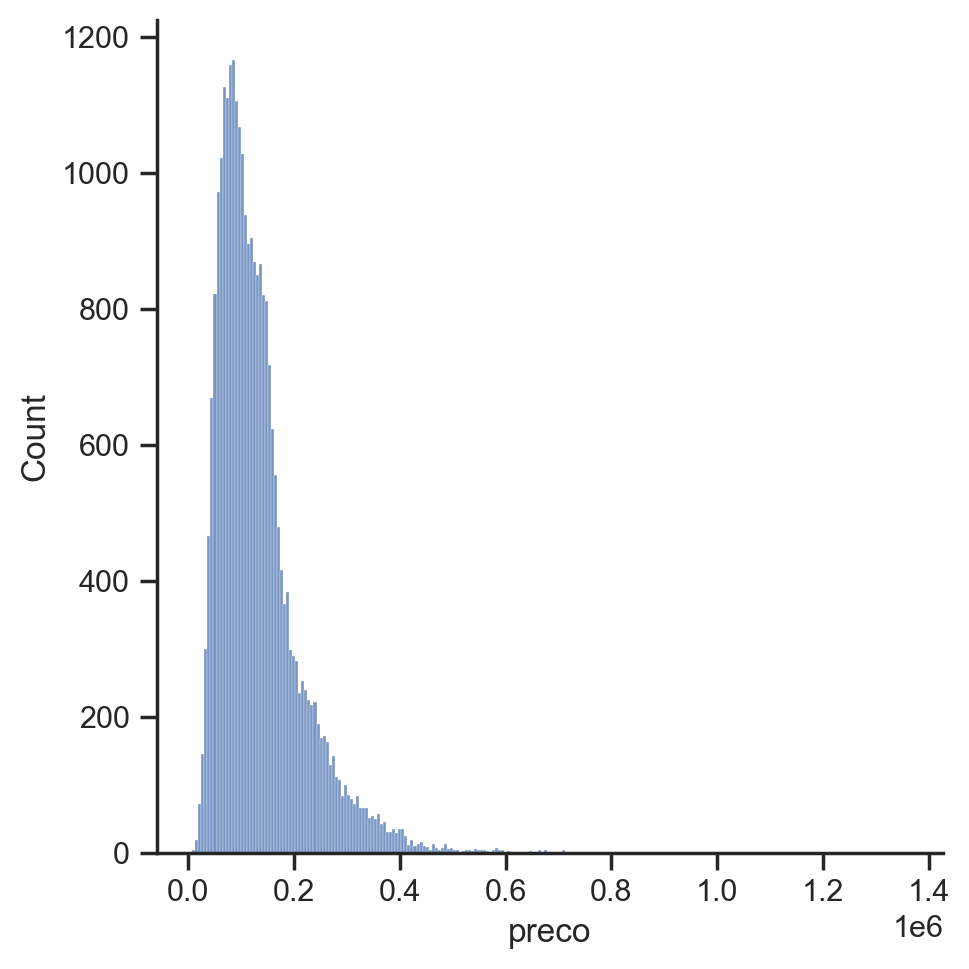

In [590]:
sns.displot(y_train)

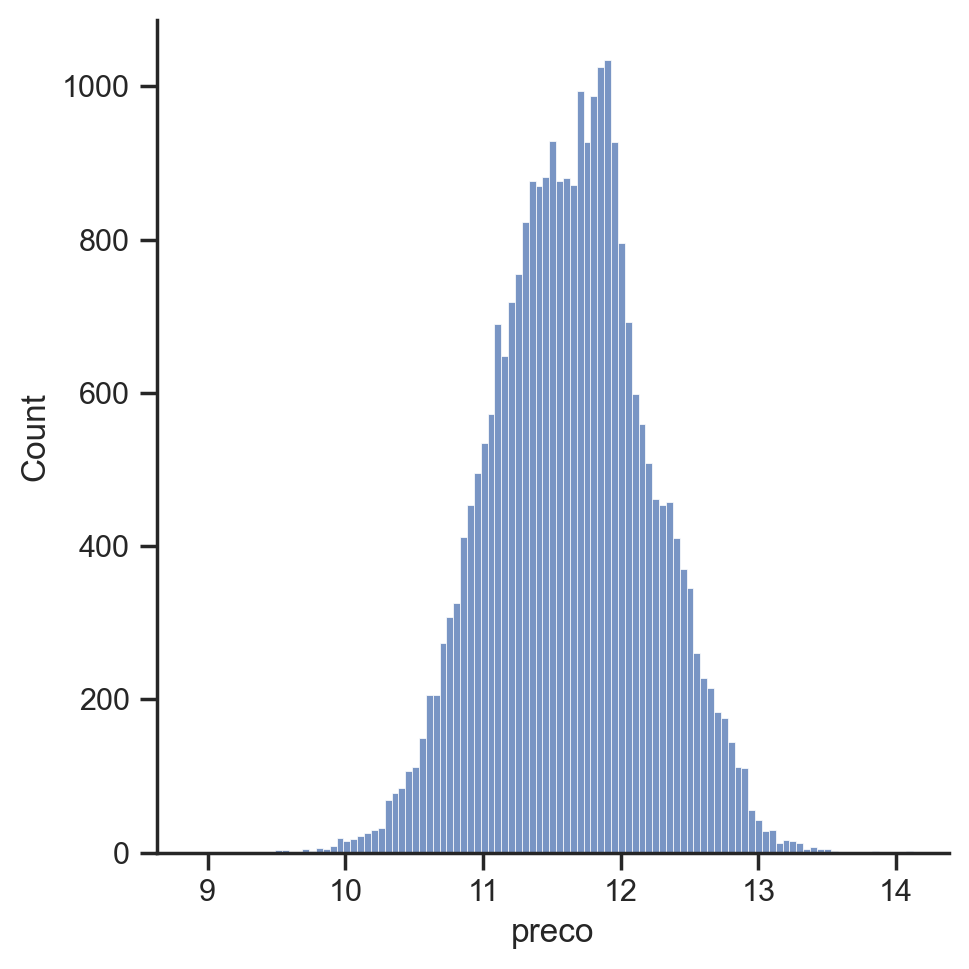

In [589]:
sns.displot(y_train_log)

In [591]:
model_log = XGBRegressor()
model_log.fit(X_train, y_train_log)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [592]:
y_test_log=np.log(y_test)

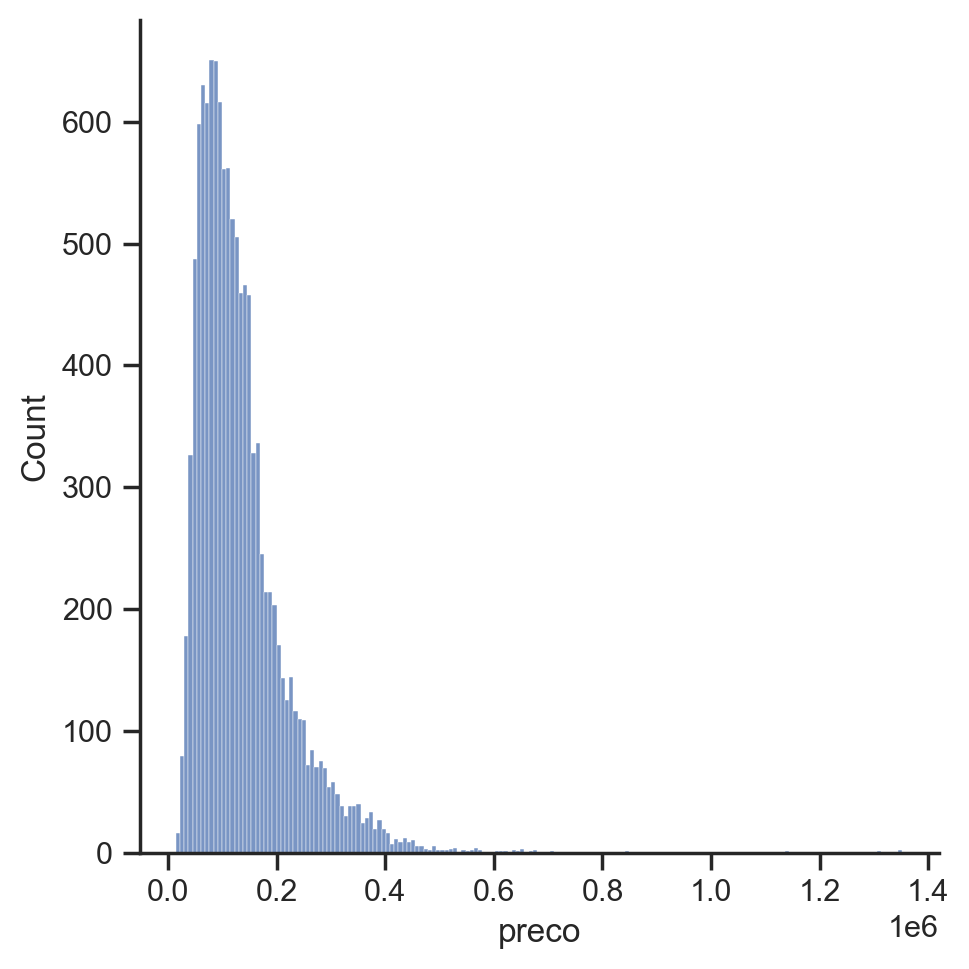

In [594]:
sns.displot(y_test)

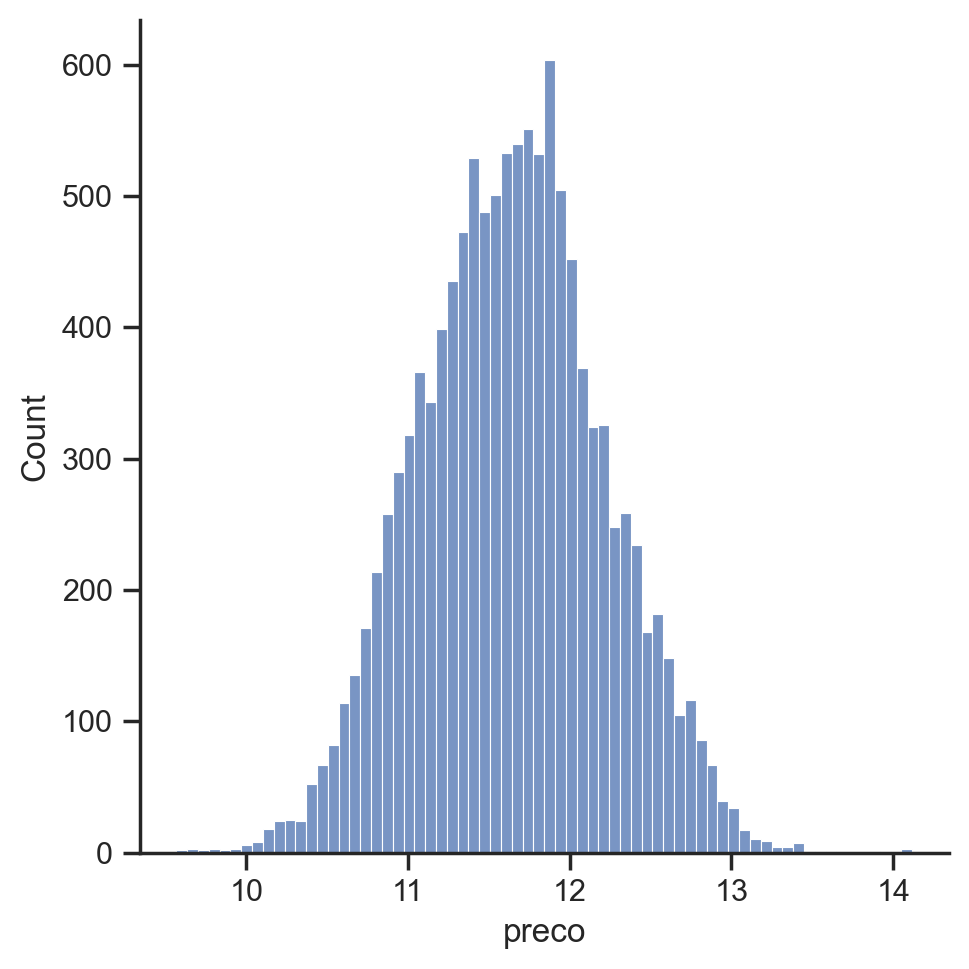

In [593]:
sns.displot(y_test_log)

In [595]:
pred_log = model_log.predict(X_test)

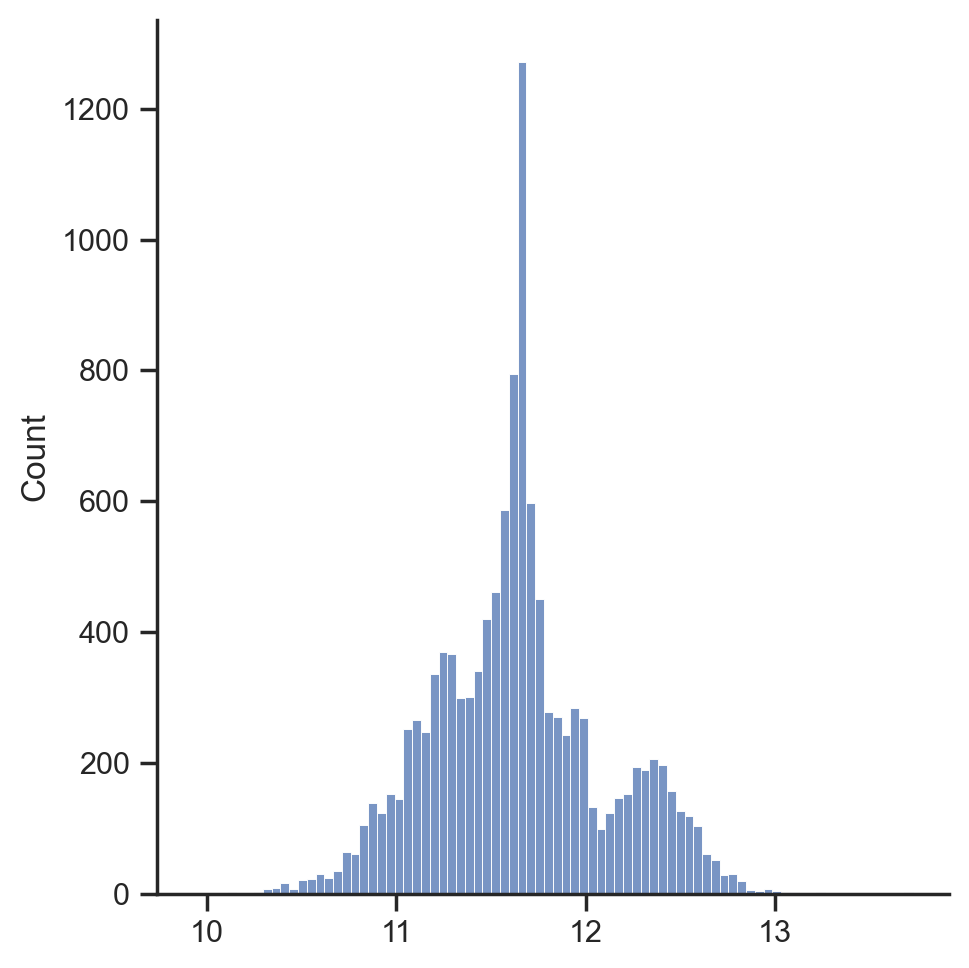

In [596]:
sns.displot(pred_log)

In [597]:
mean_absolute_error(np.pred_log,y_test_log)

0.27390535918621145

In [600]:
mean_absolute_error(np.exp(pred_log),np.exp(y_test_log))

35016.46522285496

In [598]:
np.log(2)

0.6931471805599453

In [599]:
np.exp(2)

7.38905609893065

#### Submissão

In [608]:
df_test_raw = pd.read_csv('datasets/teste.csv')

In [610]:
df_test=df_test_raw

# Separando variável dependente de variáveis independentes
y = df5['preco']
X = df5.drop(columns=['preco'])

# Separando variável dependente de variáveis independentes
# y = df['preco']
X_test = df_test.drop(columns=['ID'])

# Train/Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Seleciona todas as features categóricas com exceção da feature 'ID'
#cat_cols = df_test.select_dtypes(include=['object']).columns[1:]

# Encoder que substitui a categoria pelo número de vezes que ela aparece na feature.
# Nan é considerado uma categoria (com exceção da feature attr_veiculo_alienado que só tem Nan)
# cols: a list of columns to encode, if None, all string and categorical columns will be encoded.
# return_df: boolean for whether to return a pandas DataFrame from transform (otherwise it will be a numpy array).
#te = CountEncoder(cols=cat_cols, return_df=True)

# Dataframe X após encoding (não entendo a necessidade de colocar y_train como segundo argumento )
# te_fit = te.fit(X, y)
# X_test_pp = te_fit.transform(X_test, y)

# A única feature que ainda possui Nan é attr_veiculo_alienado
# X_test_pp = X_test_pp.fillna(0)

# Vetorização da coluna 'versao'
# count_vect = CountVectorizer()
# text_test = df_test.versao
# count_vect_fit = count_vect.fit(df.versao)
# count_matrix_test = count_vect_fit.transform(text_test)
# count_array_test = count_matrix_test.toarray()
# df_test_versao = pd.DataFrame(data=count_array_test,columns = count_vect.get_feature_names_out())

# Unindo a coluna 'versão' com todas as outras colunas
# X_test_complete = pd.concat([X_test_pp,df_test_versao], axis=1)

# xgb_tuned = XGBRegressor(n_estimators= 1700, eta= 0.01, max_depth= 9, subsample= 0.5, colsample_bytree= 0.5, min_child_weight= 3) 
# xgb_tuned.fit(X_pp, y)

# Treinando Modelo
#xgb = XGBRegressor(eval_metric='mae')
xgb_tuned4 = XGBRegressor(n_estimators= 3000, eta= 0.01, max_depth= 9, subsample= 0.5, colsample_bytree= 0.3, min_child_weight= 3)
xgb_tuned4.fit(X,np.log1p(y))
#xgb_tuned4.fit(X,y)


# Prevendo preços no conjunto de teste
pred_log = xgb_tuned4.predict(X_test)

# Calculando MAE e RMSE
# print(f'MAE: {mean_absolute_error(pred, y_test)}')
# print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
# evaluate(xgb, X_complete, np.log1p(y), cv=5) # transformação logarítmica no y

df_final = pd.concat([df_test[['ID']], pd.Series(np.expm1(pred), name='preco')], axis=1)
df_final.head()

df_final.to_csv('submission_tuned4_kumar.csv', index=False) 

ValueError: Feature shape mismatch, expected: 29, got 27

In [613]:
df_auto

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
0,105869496634249611881157692933406072990,8.0000,VOLKSWAGEN,AMAROK,2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO,2017,2017.0000,55672.0000,Automática,4,Picape,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,NaN,123231.9928
1,14165644411757892901957277406025007093,8.0000,JAGUAR,F-PACE,2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO,2017,2017.0000,47858.0000,Automática,4,Utilitário esportivo,N,Branco,PF,Rio de Janeiro,Rio Grande do Sul (RS),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,272076.0236
2,78515656948521351316652580664682810356,14.0000,CHEVROLET,CRUZE,1.8 LT 16V FLEX 4P AUTOMÁTICO,2012,2013.0000,122323.0000,Automática,4,Sedã,N,Prata,PJ,Rio de Janeiro,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53411.5395
3,36797041166808090517929207429817328298,8.0000,PORSCHE,718,2.0 16V H4 GASOLINA BOXSTER PDK,2020,2021.0000,14207.0000,Automática,2,Picape,N,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,NaN,299697.0719
4,338618517701891995317200439137014723900,8.0000,VOLVO,XC90,2.0 INSCRIPTION TURBO GASOLINA 4P 4X4 AUTOMÁTICO,2015,2016.0000,43760.0000,Automática,4,Utilitário esportivo,N,Preto,PF,Ribeirão Preto,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,255164.3442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39441,157824515938867248356804878732621234459,12.0000,VOLKSWAGEN,FOX,1.6 MSI TRENDLINE 8V FLEX 4P MANUAL,2015,2015.0000,73755.0000,Manual,4,Sedã,N,Prata,PJ,Fortaleza,Ceará (CE),Loja,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,146046.9411
39442,177911194444464888148331800784702968538,17.0000,BMW,120i,2.0 16V SPORT ACTIVEFLEX 4P AUTOMÁTICO,2016,2017.0000,78859.0000,Automática,4,Hatchback,N,Branco,PJ,Santos,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106899.9966
39443,118125566636892534226795833948655676521,8.0000,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2021,2022.0000,9793.0000,Automática,4,Sedã,N,Cinza,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,173246.6229
39444,177498527521608142997254686794131648613,15.0000,VOLKSWAGEN,AMAROK,2.0 COMFORTLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO,2018,2019.0000,51592.0000,Automática,4,Sedã,N,Branco,PJ,Campinas,São Paulo (SP),Concessionária,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221671.7954


In [612]:
df_test_raw

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado
0,24813264385557040124808779273028388499,14.0000,CHEVROLET,SPIN,1.8 LTZ 8V FLEX 4P AUTOMÁTICO,2017,2017.0000,62969.0000,Automática,4,Sedã,N,Branco,PJ,Recife,Santa Catarina (SC),Loja,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,295636316453795508942188530111300065666,8.0000,FIAT,TORO,1.8 16V EVO FLEX FREEDOM AT6,2021,2021.0000,26324.0000,Automática,4,Picape,N,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
2,101258309166227950735244624080888109884,8.0000,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2019,2020.0000,37002.0000,Automática,4,Hatchback,N,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN
3,28348734455782469411126661985772047409,15.0000,CHEVROLET,TRACKER,1.8 MPFI LTZ 4X2 16V FLEX 4P AUTOMÁTICO,2012,2015.0000,86762.0000,Automática,4,Sedã,N,Branco,PJ,Rio de Janeiro,Rio de Janeiro (RJ),Loja,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,193163160502972147671913739170248305797,8.0000,BMW,120i,2.0 16V SPORT ACTIVEFLEX 4P AUTOMÁTICO,2015,2017.0000,93040.0000,Automática,4,Sedã,N,Branco,PF,Campo Grande,Rio Grande do Sul (RS),Pessoa Física,False,False,False,NaN,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39441,238233399351588823822117090805568390727,8.0000,VOLKSWAGEN,FOX,1.0 MI 8V FLEX 4P MANUAL,2014,2014.0000,99351.0000,Manual,4,Hatchback,N,Branco,PF,Osasco,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39442,64621912306231118962468441892654163025,8.0000,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO,2016,2017.0000,87834.0000,Automática,4,Picape,N,Branco,PF,Ribeirão Preto,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39443,100311033226508317456901122129284293382,8.0000,TOYOTA,COROLLA,2.0 VVT-IE FLEX XEI DIRECT SHIFT,2021,2021.0000,14943.0000,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,NaN,Garantia de fábrica,NaN,NaN
39444,217317181330151694133399005110777689124,8.0000,JAGUAR,XF,3.0 PORTFOLIO V6 SUPERCHARGED GASOLINA 4P AUTOMÁTICO,2013,2014.0000,43726.0000,Automática,4,Sedã,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,NaN


In [611]:
X_test

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado
0,14.0000,CHEVROLET,SPIN,1.8 LTZ 8V FLEX 4P AUTOMÁTICO,2017,2017.0000,62969.0000,Automática,4,Sedã,N,Branco,PJ,Recife,Santa Catarina (SC),Loja,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0000,FIAT,TORO,1.8 16V EVO FLEX FREEDOM AT6,2021,2021.0000,26324.0000,Automática,4,Picape,N,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
2,8.0000,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2019,2020.0000,37002.0000,Automática,4,Hatchback,N,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN
3,15.0000,CHEVROLET,TRACKER,1.8 MPFI LTZ 4X2 16V FLEX 4P AUTOMÁTICO,2012,2015.0000,86762.0000,Automática,4,Sedã,N,Branco,PJ,Rio de Janeiro,Rio de Janeiro (RJ),Loja,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0000,BMW,120i,2.0 16V SPORT ACTIVEFLEX 4P AUTOMÁTICO,2015,2017.0000,93040.0000,Automática,4,Sedã,N,Branco,PF,Campo Grande,Rio Grande do Sul (RS),Pessoa Física,False,False,False,NaN,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39441,8.0000,VOLKSWAGEN,FOX,1.0 MI 8V FLEX 4P MANUAL,2014,2014.0000,99351.0000,Manual,4,Hatchback,N,Branco,PF,Osasco,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39442,8.0000,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO,2016,2017.0000,87834.0000,Automática,4,Picape,N,Branco,PF,Ribeirão Preto,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39443,8.0000,TOYOTA,COROLLA,2.0 VVT-IE FLEX XEI DIRECT SHIFT,2021,2021.0000,14943.0000,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,NaN,Garantia de fábrica,NaN,NaN
39444,8.0000,JAGUAR,XF,3.0 PORTFOLIO V6 SUPERCHARGED GASOLINA 4P AUTOMÁTICO,2013,2014.0000,43726.0000,Automática,4,Sedã,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,NaN


### Sem seleção de features e transformação

In [607]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(df_auto.drop(['preco','ID'],axis=1),df_auto.preco, random_state=42, train_size=0.7, test_size=0.3)

In [606]:
model_ss = XGBRegressor()
model_ss.fit(X_train_ss,y_train_ss,)

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:ID, marca, modelo, versao, cambio, tipo, blindado, cor, tipo_vendedor, cidade_vendedor, estado_vendedor, tipo_anuncio, attr_veiculo_aceita_troca, attr_veiculo_único_dono, attr_veiculo_todas_as_revisões_feitas_pela_concessionária, attr_veiculo_ipva_pago, attr_veiculo_licenciado, attr_veiculo_garantia_de_fábrica, attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro

In [ ]:
pred_semsem = 

## Lightgbm 

In [ ]:
import 

# PyCaret

In [69]:
import pycaret

ModuleNotFoundError: No module named 'pycaret'

In [70]:
from pycaret.regression import *

ModuleNotFoundError: No module named 'pycaret'

## Features Selecionadas

In [622]:
exp_name = setup(data = df5,  target = 'preco', fold_shuffle=True, session_id=2)


,Description,Value
0,session_id,2
1,Target,preco
2,Original Data,"(39446, 30)"
3,Missing Values,False
4,Numeric Features,29
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(27612, 29)"


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [623]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,35146.1224,2682144710.9205,51729.2051,0.6093,0.3598,0.3112,0.8610
catboost,CatBoost Regressor,35028.7578,2705011678.5554,51941.6965,0.6060,0.3571,0.3089,2.4100
gbr,Gradient Boosting Regressor,36298.4685,2796568271.1173,52828.4393,0.5925,0.3698,0.3259,1.5600
xgboost,Extreme Gradient Boosting,35725.0715,2833935488.0000,53175.1398,0.5871,0.3624,0.3147,3.4780
rf,Random Forest Regressor,38696.2661,3187833822.4492,56400.8791,0.5352,0.3919,0.3393,5.1130
lasso,Lasso Regression,40592.3012,3399682995.2000,58250.4336,0.5046,0.4406,0.3750,0.7700
ridge,Ridge Regression,40593.6758,3399680742.4000,58250.2727,0.5046,0.4407,0.3751,0.0320
llar,Lasso Least Angle Regression,40563.4754,3400323046.4000,58255.5785,0.5045,0.4401,0.3748,0.0480
lar,Least Angle Regression,40605.0645,3402489241.6000,58273.3559,0.5042,0.4436,0.3752,0.0430
lr,Linear Regression,40992.2516,3486151552.0000,58987.5645,0.4920,0.4449,0.3801,3.4280


In [620]:
df5

,ano_de_fabricacao,odometro,preco,Cars_Category_Medium_Range,Cars_Category_High_Range,Cars_Category_TopNotch_Cars,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,cambio_Manual,cambio_Semi-automática,tipo_Cupê,tipo_Hatchback,tipo_Minivan,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_S,cor_Branco,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,cor_Verde,cor_Vermelho,attr_veiculo_garantia_de_fábrica_Garantia de fábrica,num_portas_quatro,num_portas_tres
0,2017,55672.0000,123231,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2017,47858.0000,272076,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,2012,122323.0000,53411,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,2020,14207.0000,299697,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2015,43760.0000,255164,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39441,2015,73755.0000,146046,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
39442,2016,78859.0000,106899,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
39443,2021,9793.0000,173246,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
39444,2018,51592.0000,221671,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


## Dataset original

In [ ]:
exp_name_original = setup(data = df_auto,  target = 'preco', fold_shuffle=True, session_id=2)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:38:04
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
ID,Categorical
num_fotos,Categorical
marca,Categorical
modelo,Categorical
versao,Categorical
ano_de_fabricacao,Numeric
ano_modelo,Numeric
odometro,Numeric
cambio,Categorical
num_portas,Categorical


In [ ]:
best_model_original = compare_models()

In [ ]:
2+2